In [56]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

In [55]:
data = pd.read_csv('drilling_data.csv')
data.head(10)

,Дата,Начало (время),Окончание (время),Длительность (мин),Глубина долота на начало операции,Глубина долота на окончание операции,Количество свечей,Нагрузка на долото,Обороты ротора/ВСП,Момент на роторе/ВСП,...,Давление на входе,Плотность на входе,Момент на ключе,Глубина забоя,Расход на выходе,Давление на выходе,Глубина забоя на начало операции,Глубина забоя на окончание операции,Операция,Буровая площадка
0,2021-04-02,00:32:35,00:32:50,0.25,1562.97,1562.97,60,8.74,0.89,-0.03,...,98.24,1.15,0.0,1563.23,40.45,-1.63,1563.23,1563.23,ПРОМЫВКА ПРИ НЕПОДВИЖНОМ СОСТОЯНИИ,0
1,2021-04-02,00:32:50,00:33:20,0.50,1562.97,1563.03,60,0.17,4.63,1.08,...,-1.47,1.15,0.0,1563.23,4.18,-1.63,1563.23,1563.23,НЕПОДВИЖНОЕ СОСТОЯНИЕ,0
2,2021-04-02,00:33:20,00:36:10,2.83,1563.03,1563.01,61,0.00,7.82,0.77,...,-0.94,1.15,0.0,1563.23,0.00,-1.63,1563.23,1563.23,НАРАЩИВАНИЕ,0
3,2021-04-02,00:36:20,00:36:26,0.10,1562.71,1562.71,61,0.00,0.89,-0.03,...,0.38,1.15,0.0,1563.23,0.19,-1.63,1563.23,1563.23,НЕПОДВИЖНОЕ СОСТОЯНИЕ,0
4,2021-04-02,00:36:26,00:40:46,4.33,1562.71,1562.62,61,0.00,0.94,-0.01,...,135.30,1.15,0.0,1563.23,41.47,-1.63,1563.23,1563.23,ПРОМЫВКА ПРИ НЕПОДВИЖНОМ СОСТОЯНИИ,0
5,2021-04-02,00:40:46,00:41:08,0.37,1562.62,1560.95,61,0.00,0.89,-0.03,...,149.23,1.15,0.0,1563.23,45.56,-1.63,1563.23,1563.23,ПОДЪЕМ С ПРОМЫВКОЙ,0
6,2021-04-02,00:41:08,00:41:37,0.48,1560.95,1562.13,61,10.20,0.88,-0.03,...,150.14,1.15,0.0,1563.23,45.49,-1.63,1563.23,1563.23,СПУСК С ПРОМЫВКОЙ,0
7,2021-04-02,00:42:30,00:45:19,2.82,1563.25,1564.38,61,11.95,0.93,0.03,...,152.04,1.15,0.0,1564.13,45.40,-1.63,1563.25,1564.43,НАПРАВЛЕННОЕ БУРЕНИЕ,0
8,2021-04-02,00:45:19,00:45:29,0.17,1564.38,1564.04,61,2.13,0.88,-0.02,...,147.82,1.15,0.0,1564.43,45.51,-1.63,1564.43,1564.43,ПОДЪЕМ С ПРОМЫВКОЙ,0
9,2021-04-02,00:45:29,00:45:50,0.35,1564.04,1564.43,61,5.34,0.88,-0.02,...,147.26,1.15,0.0,1564.43,45.30,-1.63,1564.43,1564.43,ДОПУСК БУРИЛЬНОЙ КОЛОННЫ ДО ЗАБОЯ,0


In [ ]:
data.isnull().sum()

Дата                                    0
Начало (время)                          0
Окончание (время)                       0
Длительность (мин)                      0
Глубина долота на начало операции       0
Глубина долота на окончание операции    0
Количество свечей                       0
Нагрузка на долото                      0
Обороты ротора/ВСП                      0
Момент на роторе/ВСП                    0
Расход на входе                         0
Давление на входе                       0
Плотность на входе                      0
Момент на ключе                         0
Глубина забоя                           0
Расход на выходе                        0
Давление на выходе                      0
Глубина забоя на начало операции        0
Глубина забоя на окончание операции     0
Операция                                0
Буровая площадка                        0
dtype: int64

In [ ]:
data['Дельта глубины забоя'] = data['Глубина забоя на окончание операции'] - data['Глубина забоя на начало операции']
data['Дельта глубины долота'] = data['Глубина долота на окончание операции'] - data['Глубина долота на начало операции']

In [ ]:
for i, row in data.iterrows():
    if row['Буровая площадка'] != 9:
      data.at[i,'Буровая площадка'] = 0
    if 'БУРЕНИЕ' in row['Операция']:
      data.at[i,'Группа'] = 'БУРЕНИЕ'
      continue
    if 'СПУСК' in row['Операция'] or 'ДОПУСК БУРИЛЬНОЙ КОЛОННЫ ДО ЗАБОЯ' in row['Операция']:
      data.at[i,'Группа'] = 'СПУСК'
      continue
    if 'ПОДЪЕМ' in row['Операция']:
      data.at[i,'Группа'] = 'ПОДЪЕМ'
      continue
    if 'НАРАЩИВАНИЕ' in row['Операция']:
      data.at[i,'Группа'] = 'НАРАЩИВАНИЕ'
      continue
    if 'НЕПОДВИЖНОЕ СОСТОЯНИЕ' in row['Операция']:
      data.at[i,'Группа'] = 'НЕПОДВИЖНОЕ СОСТОЯНИЕ'
      continue
    if 'ПРОМЫВКА' in row['Операция']:
      data.at[i,'Группа'] = 'ПРОМЫВКА'
    if 'УДЕРЖАНИЕ НА КЛИНЬЯХ' in row['Операция']:
      data.at[i,'Группа'] = 7
    if 'ИНОЕ' in row['Операция']:
      data.at[i,'Группа'] = 8

operation_names = ['СПУСК С ПРОМЫВКОЙ', 'СПУСК С ПРОРАБОТКОЙ', 'СПУСК В СКВАЖИНУ', 'СПУСК БУРИЛЬНОЙ СВЕЧИ В СКВАЖИНУ',
                   'СПУСК СВЕЧИ С ВРАЩЕНИЕМ И ЦИРКУЛЯЦИЕЙ НА ДЛИНУ СВЕЧИ', 'СПУСК СВЕЧИ С ВРАЩЕНИЕМ И ЦИРКУЛЯЦИЕЙ НА ДЛИНУ ТРУБЫ',
                   'СПУСК ОБСАДНОЙ КОЛОННЫ НА ДЛИНУ ТРУБЫ В СКВАЖИНУ',
                   'ДОПУСК БУРИЛЬНОЙ КОЛОННЫ ДО ЗАБОЯ', 'ПОДЪЕМ С ПРОМЫВКОЙ', 'ПОДЪЕМ С ПРОРАБОТКОЙ', 'ПОДЪЕМ ИЗ СКВАЖИНЫ',
                   'ПОДЪЕМ СВЕЧИ С ВРАЩЕНИЕМ И ЦИРКУЛЯЦИЕЙ НА ДЛИНУ СВЕЧИ',
                   'ПОДЪЕМ БУРИЛЬНОЙ КОЛОННЫ С ВРАЩЕНИЕМ И ЦИРКУЛЯЦИЕЙ НА ДЛИНУ ТРУБЫ',
                   'ПОДЪЕМ БУРИЛЬНОЙ КОЛОННЫ НА ДЛИНУ СВЕЧИ', 'ПРОМЫВКА С ВРАЩЕНИЕМ', 'ПРОМЫВКА ПРИ НЕПОДВИЖНОМ СОСТОЯНИИ',
                   'РОТОРНОЕ БУРЕНИЕ', 'ВЫРАБОТКА НАГРУЗКИ (РОТОРНОЕ БУРЕНИЕ)', 'НАПРАВЛЕННОЕ БУРЕНИЕ', 
                   'ВЫРАБОТКА НАГРУЗКИ (НАПРАВЛЕННОЕ БУРЕНИЕ)', 'УДЕРЖАНИЕ НА КЛИНЬЯХ', 'НАРАЩИВАНИЕ',
                   'НЕПОДВИЖНОЕ СОСТОЯНИЕ', 'ИНОЕ']
operation_ids = [21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 61, 62, 11, 12, 13, 14, 71, 41, 51, 81]

for i, row in data.iterrows():
    for name_op, id_op in zip(operation_names, operation_ids):
        if name_op == row['Операция']:
            data.at[i,'Номер операции'] = id_op
    
#data = data.astype({"Группа": int, "Номер операции": int})
data = data.drop(columns=['Операция'])

In [ ]:
data.head()

,Дата,Начало (время),Окончание (время),Длительность (мин),Глубина долота на начало операции,Глубина долота на окончание операции,Количество свечей,Нагрузка на долото,Обороты ротора/ВСП,Момент на роторе/ВСП,Расход на входе,Давление на входе,Плотность на входе,Момент на ключе,Глубина забоя,Расход на выходе,Давление на выходе,Глубина забоя на начало операции,Глубина забоя на окончание операции,Буровая площадка,Дельта глубины забоя,Дельта глубины долота,Группа,Номер операции
0,2021-04-02,00:32:35,00:32:50,0.25,1562.97,1562.97,60,8.74,0.89,-0.03,24.97,98.24,1.15,0.0,1563.23,40.45,-1.63,1563.23,1563.23,0,0.0,0.00,ПРОМЫВКА,62.0
1,2021-04-02,00:32:50,00:33:20,0.50,1562.97,1563.03,60,0.17,4.63,1.08,0.00,-1.47,1.15,0.0,1563.23,4.18,-1.63,1563.23,1563.23,0,0.0,0.06,НЕПОДВИЖНОЕ СОСТОЯНИЕ,51.0
2,2021-04-02,00:33:20,00:36:10,2.83,1563.03,1563.01,61,0.00,7.82,0.77,0.00,-0.94,1.15,0.0,1563.23,0.00,-1.63,1563.23,1563.23,0,0.0,-0.02,НАРАЩИВАНИЕ,41.0
3,2021-04-02,00:33:20,00:36:10,2.83,1563.03,1563.01,61,0.00,7.82,0.77,0.00,-0.94,1.15,0.0,1563.23,0.00,-1.63,1563.23,1563.23,0,0.0,-0.02,НАРАЩИВАНИЕ,41.0
4,2021-04-02,00:33:20,00:36:10,2.83,1563.03,1563.01,61,0.00,7.82,0.77,0.00,-0.94,1.15,0.0,1563.23,0.00,-1.63,1563.23,1563.23,0,0.0,-0.02,НАРАЩИВАНИЕ,41.0


Text(0, 0.5, 'Среднее значение')

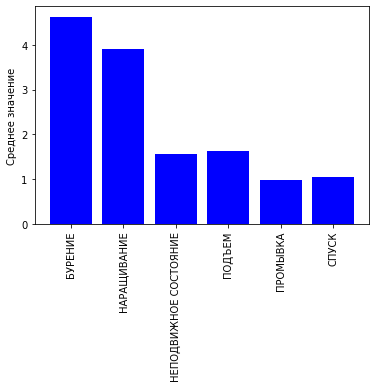

In [ ]:
x1 = data.groupby('Группа').mean().reset_index()
plt.bar(range(len(x1)), x1['Длительность (мин)'], color="blue")
plt.xticks(range(len(x1)), x1['Группа'] , rotation=90)
plt.ylabel('Среднее значение')

In [ ]:
data.groupby('Группа').mean().reset_index()

,Группа,Длительность (мин),Глубина долота на начало операции,Глубина долота на окончание операции,Количество свечей,Нагрузка на долото,Обороты ротора/ВСП,Момент на роторе/ВСП,Расход на входе,Давление на входе,Плотность на входе,Момент на ключе,Глубина забоя,Расход на выходе,Давление на выходе,Глубина забоя на начало операции,Глубина забоя на окончание операции,Буровая площадка,Дельта глубины забоя,Дельта глубины долота,Номер операции
0,БУРЕНИЕ,4.628754,2193.390108,2195.457569,78.013846,7.518923,65.467323,2.671646,38.595862,152.780292,1.109462,0.000000,2199.032938,31.882415,0.780631,2197.161662,2201.306985,1.592308,4.145323,2.067462,12.067692
1,НЕПОДВИЖНОЕ СОСТОЯНИЕ,1.549903,1281.902447,1282.419476,46.427184,7.654641,0.848583,0.935825,0.311184,1.965320,1.130660,0.006641,1529.906621,15.095379,1.640214,1529.904000,1529.904000,2.988350,0.000000,0.517029,51.000000
2,ПОДЪЕМ,2.012399,1562.160209,1555.861326,55.871758,0.782262,19.239683,1.258610,30.977118,90.492406,1.135137,0.001830,1770.713955,23.275065,0.288732,1770.710785,1770.710785,2.645533,0.000000,-6.298883,34.036023
3,ПРОМЫВКА,0.978911,1759.436200,1766.428225,62.816921,2.185763,39.348571,2.277538,38.844431,122.085492,1.122795,0.000763,1934.464570,30.217760,0.675125,1934.461782,1934.462670,3.052011,0.000888,6.992025,61.346741
4,СПУСК,1.040035,1494.945584,1504.691349,54.651613,2.738199,24.300727,1.906909,33.735443,103.036358,1.126000,0.011038,1704.885724,25.818487,0.570979,1704.882106,1704.240933,2.575953,-0.641173,9.745765,24.317302


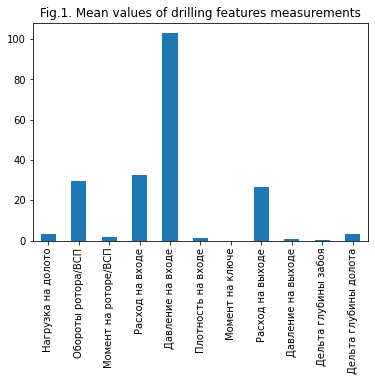

In [ ]:
gtr_features = ['Нагрузка на долото', 'Обороты ротора/ВСП', 'Момент на роторе/ВСП', 'Расход на входе', 'Давление на входе', 'Плотность на входе', 
             'Момент на ключе', 'Расход на выходе', 'Давление на выходе', 'Дельта глубины забоя', 'Дельта глубины долота']
feature_vectors = data[gtr_features]
feature_vectors.mean().plot(kind='bar',title='Fig.1. Mean values of drilling features measurements')

In [ ]:
box_pal = sns.color_palette(['turquoise','darkcyan'])

def plot_boxplots(data):
    fig, axes = plt.subplots(data.shape[1],1)
    fig.set_figheight(13)
    fig.set_figwidth(8)
    for c in range(data.shape[1]):
        axes[c] = sns.boxplot(data = data[data.columns[c]],
                              ax = axes[c],palette = box_pal,orient='h'
                              ,fliersize=10).set_title(data[data.columns[c]].name)
    plt.tight_layout()

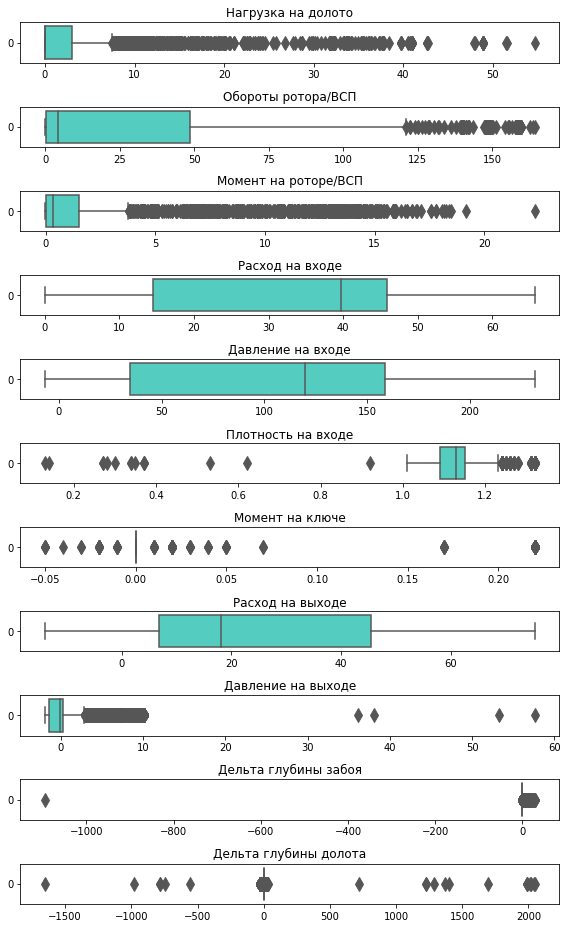

In [ ]:
plot_boxplots(feature_vectors)

In [ ]:
data['Номер операции'].value_counts()

61    942
51    515
28    507
62    500
31    456
21    385
22    316
11    305
41    236
32    204
34    166
13    143
35    124
33    118
23    118
25    111
14    103
12     99
27     80
36     63
24     63
26     32
Name: Номер операции, dtype: int64

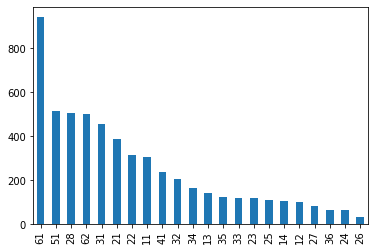

In [ ]:
data['Номер операции'].value_counts().plot(kind='bar');

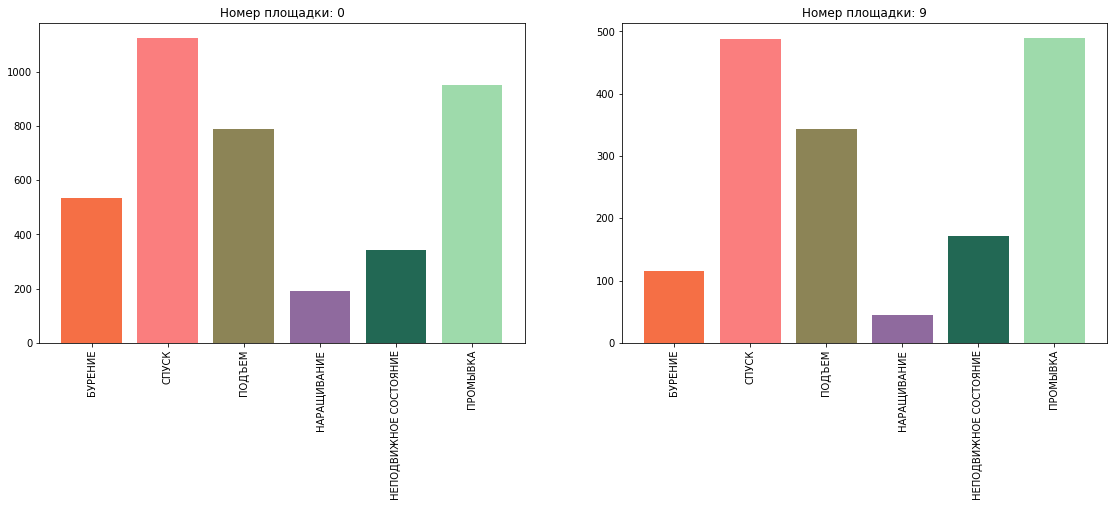

In [ ]:
# Let's look at the distribution of drilling in different wells
group_names = ['БУРЕНИЕ', 'СПУСК', 'ПОДЪЕМ', 'НАРАЩИВАНИЕ', 'НЕПОДВИЖНОЕ СОСТОЯНИЕ', 'ПРОМЫВКА']
group_colors = ['#F56F45', '#FA7E7E','#8C8456','#8F6A9E', '#226854','#9EDAAB', '#7C97FC', '#25C4EF'] 
well = data['Буровая площадка'].values
operations_numb = data['Группа'].values

plt.figure(figsize=(40,20))

for i, wn in enumerate(np.unique(well)):
    ax = plt.subplot(3, 4, i+1)
    hist = np.histogram(operations_numb[well == wn], bins=np.arange(7)+.7)
    plt.bar(np.arange(len(hist[0])), hist[0], color=group_colors, align='center')
    ax.set_title('Номер площадки: ' + str(wn))
    ax.set_xticks(np.arange(len(hist[0])))
    ax.set_xticklabels(group_names, rotation=90)
# Скважина 9 содержит все имеющиеся классы (буровые операции), поэтому в дальнейшем при  классификации 
# эта скважина будет использоваться в качестве тестовой

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, RobustScaler, PowerTransformer

In [ ]:
def combine_dataframe(df,norm):
    return pd.DataFrame(norm.fit_transform(df))

In [ ]:
feature_vectors.head(5)

,Нагрузка на долото,Обороты ротора/ВСП,Момент на роторе/ВСП,Расход на входе,Давление на входе,Плотность на входе,Момент на ключе,Расход на выходе,Давление на выходе,Дельта глубины забоя,Дельта глубины долота
0,8.74,0.89,-0.03,24.97,98.24,1.15,0.00,40.45,-1.63,0.0,0.00
1,0.17,4.63,1.08,0.00,-1.47,1.15,0.00,4.18,-1.63,0.0,0.06
2,0.00,7.82,0.77,0.00,-0.94,1.15,0.00,0.00,-1.63,0.0,-0.02
3,0.00,0.89,-0.03,0.10,0.38,1.15,0.00,0.19,-1.63,0.0,0.00
4,0.00,0.94,-0.01,42.29,135.30,1.15,0.00,41.47,-1.63,0.0,-0.09
...,...,...,...,...,...,...,...,...,...,...,...
4607,0.00,-0.02,0.00,0.00,-5.35,1.31,-0.02,0.00,0.07,0.0,11.73
4608,0.00,-0.02,0.00,0.00,-5.35,1.31,-0.02,0.00,0.07,0.0,11.73
4609,0.00,-0.02,0.00,0.00,-5.35,1.31,-0.02,0.00,0.07,0.0,11.73
4610,0.00,-0.02,0.00,0.00,-5.35,1.32,0.05,0.00,0.07,0.0,0.45


In [ ]:
data_ss = combine_dataframe(feature_vectors,StandardScaler())
data_mm = combine_dataframe(feature_vectors,MinMaxScaler())
data_qt = combine_dataframe(feature_vectors,QuantileTransformer())
data_pt = combine_dataframe(feature_vectors,PowerTransformer(method='yeo-johnson',standardize=True))

In [ ]:
group1 = pd.DataFrame.from_dict({'Группа': data['Группа'], 'Буровая площадка': data['Буровая площадка']})
group2 = pd.DataFrame.from_dict({'Номер операции': data['Номер операции'], 'Буровая площадка': data['Буровая площадка']})

In [ ]:
base = 'out/'
pd.concat([data_ss, group1], axis=1).to_csv(base + 'data_ss.csv', index=False)
pd.concat([data_mm, group1], axis=1).to_csv(base + 'data_mm.csv', index=False)
pd.concat([data_qt, group1], axis=1).to_csv(base + 'data_qt.csv', index=False)
pd.concat([data_pt, group1], axis=1).to_csv(base + 'data_pt.csv', index=False)

In [ ]:
a = pd.DataFrame.from_dict({'categorical': data['Группа']})
dum = pd.get_dummies(a.astype(str), drop_first=True)
df1 = pd.concat([dum, group2], axis=1)

In [ ]:
base = 'out/'
pd.concat([data_ss, df1], axis=1).to_csv(base + 'data_ss_one_hot.csv', index=False)
pd.concat([data_mm, df1], axis=1).to_csv(base + 'data_mm_one_hot.csv', index=False)
pd.concat([data_qt, df1], axis=1).to_csv(base + 'data_qt_one_hot.csv', index=False)
pd.concat([data_pt, df1], axis=1).to_csv(base + 'data_pt_one_hot.csv', index=False)